In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys
wheel = dv.ColorWheel()

In [2]:
# USING THIS ALLOWS ME TO IMPORT Subject Object
sys.path.insert(0, r"C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Analysis and Figures Scripts\Exp1 Scripts") 
from Simulation_Object import *
from Subject_Object import *


## Pickle Objects

In [3]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
os.path.normpath(load_path)
subject_object_dict = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))
# PICK SPECIFIC SUBJECTS, DON'T LOOP EVERY TIME
subject_simulation_dict_sd50 = {}

## Create Class

### Generic simulations

In [4]:
if os.path.exists(r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\\Model Objects\\generic_sim_sd50.pkl'):
    generic_sim_sd50 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = '',reaction_time_mean = 300, movement_time_mean = 90, timing_uncertainty=100, 
                                        reaction_uncertainty = 30, movement_uncertainty = 30,agent_uncertainty = 50)
    generic_sim_sd150 = Optimal_Decision_Time_Simulation(sub_name = '', reaction_time_mean = 300, movement_time_mean = 90, timing_uncertainty=100, 
                                            reaction_uncertainty = 30, movement_uncertainty = 30,agent_uncertainty = 150)

    save_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\\'
    dill.dump(generic_sim_sd50,open(save_path + 'generic_sim_sd50.pkl', 'wb'))
    dill.dump(generic_sim_sd150,open(save_path + 'generic_sim_sd150.pkl', 'wb'))

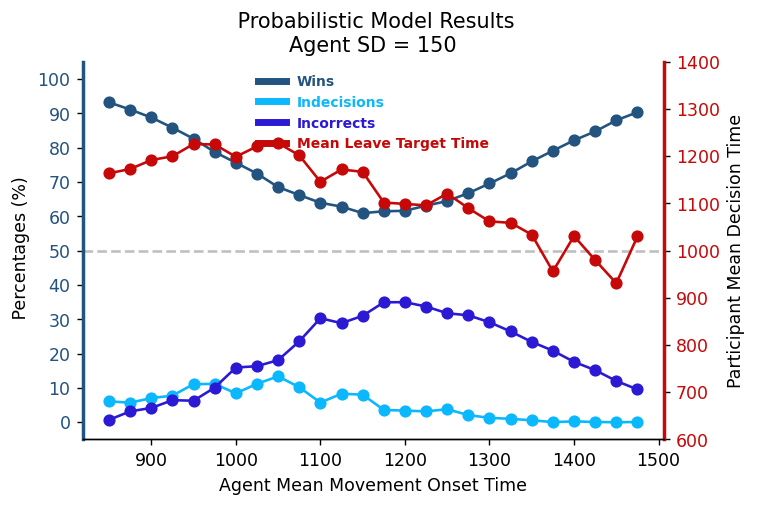

In [5]:
generic_sim_sd150.plot_optimals_all_on_one(metrics_ax1 = ['Wins','Indecisions','Incorrects'],metrics_ax2 = ['Mean Leave Target Time'])

### Subject simulations

In [6]:
subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12']
for subname in subnames:
    print(subname)
    o = subject_object_dict[subname]
    temp = Optimal_Decision_Time_Simulation(sub_name = subname,reaction_time_mean = o.reaction_time_minus_sd, movement_time_mean = o.reaction_movement_time_mean, 
                                            timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                            agent_uncertainty = 50)
    # dill.dump(temp,open(save_path + f'{subname}_sim_sd50.pkl', 'wb'))
    subject_simulation_dict_sd50.update({subname:temp})

Sub1
Sub2
Sub3
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12


In [7]:
# dill.dump(subject_simulation_dict_sd50,open(save_path+'subject_simulation_dict_sd50.pkl','wb'))


In [8]:
subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12']
subject_simulation_dict_sd150 = {}

for subname in subnames:
    print(subname)
    o = subject_object_dict[subname]
    temp = Optimal_Decision_Time_Simulation(sub_name = subname,reaction_time_mean = o.reaction_time_minus_sd, movement_time_mean = o.reaction_movement_time_mean, 
                                            timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                            agent_uncertainty = 150)
    dill.dump(temp,open(save_path + f'{subname}_sim_sd150.pkl', 'wb'),)
    subject_simulation_dict_sd150.update({subname:temp})

Sub1
Sub2
Sub3
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12


In [ ]:
# dill.dump(subject_simulation_dict_sd150,open(save_path+'subject_simulation_dict_sd150.pkl','wb'))

### Run Group simulation 

Agent SD = 50

In [ ]:
o = group
save_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\\'
temp = Optimal_Decision_Time_Simulation(NUM_TRIALS = 100000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
                                        timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                        agent_uncertainty = 50)
dill.dump(temp,open(save_path + f'group_sim_sd50.pkl', 'wb'))

Agent SD = 150

In [ ]:
o = group
temp = Optimal_Decision_Time_Simulation(NUM_TRIALS = 100000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
                                        timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                        agent_uncertainty = 150)
dill.dump(temp,open(save_path + f'group_sim_sd150.pkl', 'wb'))